# Assignment 2

## Problem 1:Linear Regression

### Task 1:Load the dataset named assignment2_part1.csv 



In [96]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

In [97]:
import pandas as pd
data = pd.read_csv("assignment2_part1.csv")
data.head()

,Unnamed: 0,x,y
0,0,-15.0,-2156.994097
1,1,-14.5,-1956.523904
2,2,-14.0,-1778.151738
3,3,-13.5,-1610.924846
4,4,-13.0,-1456.176307


In [98]:
data.shape

(80, 3)

### Task 2:Split this given dataset into training set,testing set and validation set (80% data as training set,10% as testing and other 10% as validation)

In [99]:
#Your code here
#option 1
from sklearn.model_selection import train_test_split
X=data[['x']]
y=data[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.1/0.9), random_state=1)

In [100]:
data1=pd.merge(X_train,y_train,left_index=True,right_index=True) #Train data
data1_2=pd.merge(X_val,y_val,left_index=True,right_index=True) #Validation data
data1_3=pd.merge(X_test,y_test,left_index=True,right_index=True) #Test data

In [101]:
print data1.shape
print data1_2.shape
print data1_3.shape

(64, 2)
(8, 2)
(8, 2)


### Task 3: Visualize the data and try to fit a linear (regression) model to it and comment whether you think this data is suitable to fit a linear model.

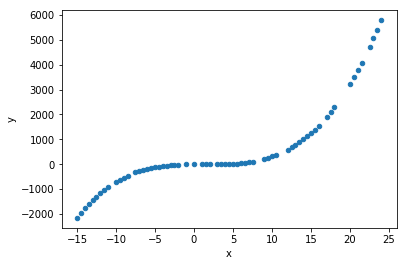

In [102]:
#Your code here
data1.plot(x='x',y='y',kind='scatter')

It does not fit a linear model from the above fig.

In [103]:
lm = smf.ols(formula='y~x', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           1.22e-21
Time:                        14:49:48   Log-Likelihood:                -520.44
No. Observations:                  64   AIC:                             1045.
Df Residuals:                      62   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.6712    109.806      0.525      0.6

### Task 4: Visualize the regression fit

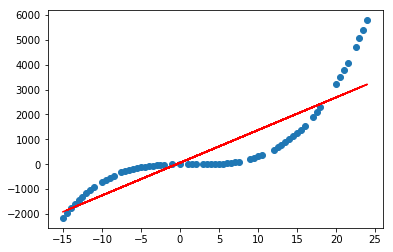

In [104]:
#Your code here
data1['ypred']=lm.predict() #predicted regression values
plt.plot(data1.x,data1.y,'o') #plot the data
plt.plot(data1.x,data1.ypred,'-r') #plot the regression

### Task 5: Try to introduce another regressor variable if you think that linear model was not apt for this.

In [105]:
#Your code here
#introduce another regressor being a 3 power of x
data1['x2']=data1.x**2

### Task 6: Fit a regression model to it,now with 2 regressor variables and also visualize the results

In [106]:
#Your code here
#fit a multi-variate linear model using x and x**3 as two regressors
lm2 = smf.ols(formula='y~x+x2', data = data1).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           1.80e-28
Time:                        14:49:51   Log-Likelihood:                -500.88
No. Observations:                  64   AIC:                             1008.
Df Residuals:                      61   BIC:                             1014.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -483.8536    111.150     -4.353      0.0

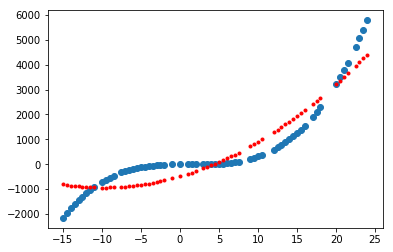

In [107]:
#visualize regression fit
data1['ypred']=lm2.predict() #predicted regression values
plt.plot(data1.x,data1.y,'o') #plot the data
plt.plot(data1.x,data1.ypred,'.r') #plot the regression
#sbn.regplot(x='x',y='ypred',data=data1) #plot the regression

### Task 7: Generate regressors in the validation sample in range from M=12(Max power of x) and compute the model prediction.Visualize the fit of the model.

In [108]:
#create regressors for validation set
M=12
for p in range(1,M+1):
    data1_2['x%d'%p]=data1_2.x**p
data1_2.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
67,18.5,2497.509043,18.5,342.25,6331.625,117135.0625,2.166999e+06,4.008948e+07,7.416553e+08,1.372062e+10,2.538315e+11,4.695883e+12,8.687384e+13,1.607166e+15
29,-0.5,0.566544,-0.5,0.25,-0.125,0.0625,-3.125000e-02,1.562500e-02,-7.812500e-03,3.906250e-03,-1.953125e-03,9.765625e-04,-4.882812e-04,2.441406e-04
35,2.5,-5.702139,2.5,6.25,15.625,39.0625,9.765625e+01,2.441406e+02,6.103516e+02,1.525879e+03,3.814697e+03,9.536743e+03,2.384186e+04,5.960464e+04
9,-10.5,-811.861672,-10.5,110.25,-1157.625,12155.0625,-1.276282e+05,1.340096e+06,-1.407100e+07,1.477455e+08,-1.551328e+09,1.628895e+10,-1.710339e+11,1.795856e+12
68,19.0,2721.708052,19.0,361.00,6859.000,130321.0000,2.476099e+06,4.704588e+07,8.938717e+08,1.698356e+10,3.226877e+11,6.131066e+12,1.164903e+14,2.213315e+15


In [109]:
#create regressors for training set
M=12
for p in range(1,M+1):
    data1['x%d'%p]=data1.x**p
data1.head()

,x,y,ypred,x2,x1,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
51,10.5,366.764155,994.323240,110.25,10.5,1157.625,12155.0625,127628.15625,1.340096e+06,1.407100e+07,1.477455e+08,1.551328e+09,1.628895e+10,1.710339e+11,1.795856e+12
20,-5.0,-121.561982,-826.647138,25.00,-5.0,-125.000,625.0000,-3125.00000,1.562500e+04,-7.812500e+04,3.906250e+05,-1.953125e+06,9.765625e+06,-4.882812e+07,2.441406e+08
7,-11.5,-1044.071813,-923.991857,132.25,-11.5,-1520.875,17490.0625,-201135.71875,2.313061e+06,-2.660020e+07,3.059023e+08,-3.517876e+09,4.045558e+10,-4.652391e+11,5.350250e+12
54,12.0,582.166661,1289.359778,144.00,12.0,1728.000,20736.0000,248832.00000,2.985984e+06,3.583181e+07,4.299817e+08,5.159780e+09,6.191736e+10,7.430084e+11,8.916100e+12
34,2.0,-3.430170,-281.505148,4.00,2.0,8.000,16.0000,32.00000,6.400000e+01,1.280000e+02,2.560000e+02,5.120000e+02,1.024000e+03,2.048000e+03,4.096000e+03


In [110]:
#create a formulae for multi-variate regression using list comprehension
formula='y~x+'+'+'.join(['x%d'%p for p in range(2,M+1)]); formula

'y~x+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12'

In [111]:
lm12 = smf.ols(formula=formula, data = data1).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.220e+05
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          5.55e-113
Time:                        14:49:55   Log-Likelihood:                -250.47
No. Observations:                  64   AIC:                             520.9
Df Residuals:                      54   BIC:                             542.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003   2.22e-05     13.240      0.0

Text(0,0.5,'y')

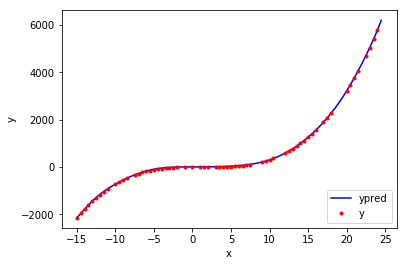

In [130]:
#visualize regression fit
#data1['ypred']=lm12.predict(data1) #predicted regression values

x= np.arange(-15,25,0.5)
y=pd.DataFrame(np.array([x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12]).T,columns=['x','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12'])
plt.plot(x, lm12.predict(y), 'b',label='ypred')

plt.plot(data1.x,data1.y,'.r') #plot the data
#plt.plot(data1.x,data1.ypred,'b') #plot the regression

plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')

In [113]:
R2 = []; Params = []
for M in range(1,13):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm = smf.ols(formula = formula, data = data1_2).fit()
    R2.append(lm.rsquared)
    Params.append(lm.params)

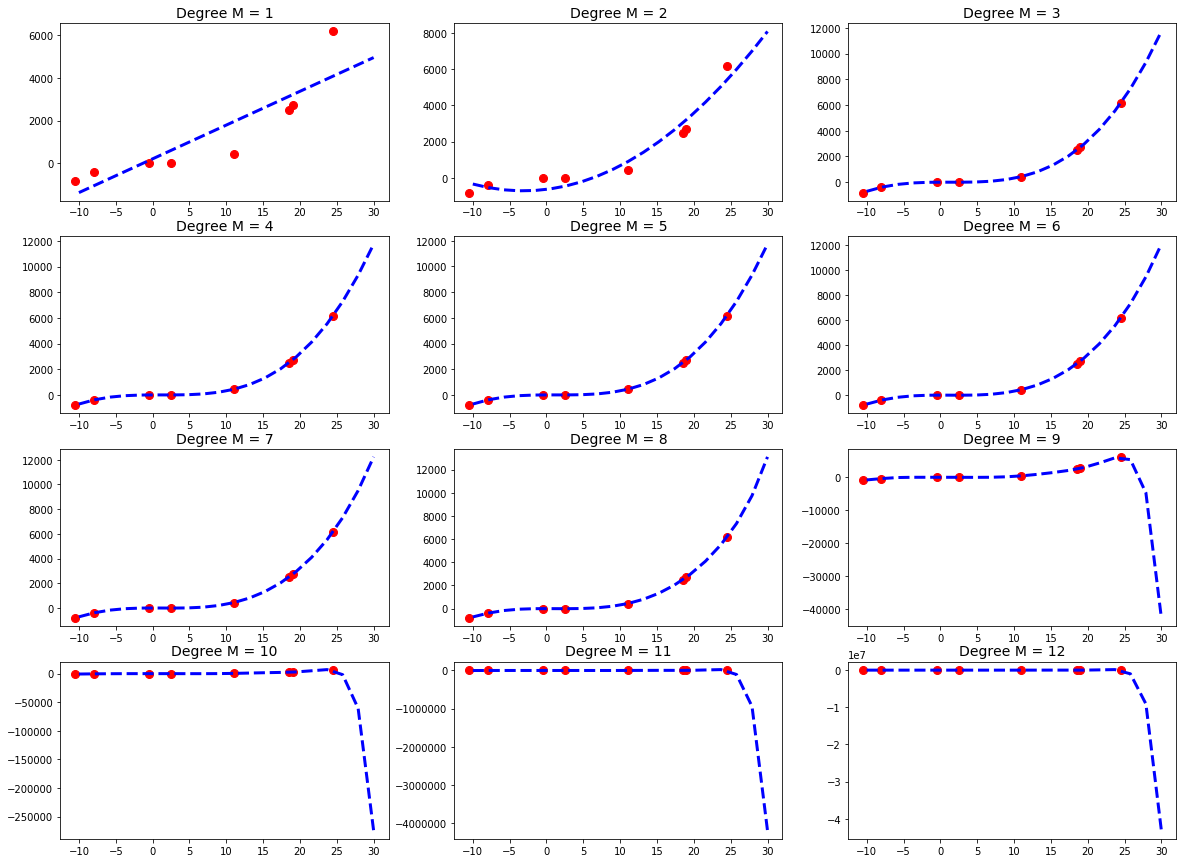

In [114]:
#visualize all the fits
plt.figure(figsize = (20,15))

for M in range(1,13):
    plt.subplot(4,3,M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-10,30,num=20)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(data1_2.x, data1_2.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, y_fit, 'b--', lw = 3)                # Blue dashed line, our fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 14)

### Task 8:Train the polinomial model over training sample and compute R2 over the validation data for each power m=1,2,...12

In [126]:
M=12
for p in range(1,M+1): #add more powers of x up to M'th
    data1_2['x%d'%p]=data1_2.x**p
data1_2['ypred']=lm12.predict(data1_2)
data1_2['ypred']

67    2487.558768
29      -0.072954
35       5.452073
9     -819.990838
68    2714.020951
79    6203.616495
52     422.650845
14    -402.525431
Name: ypred, dtype: float64

Text(0,0.5,'y')

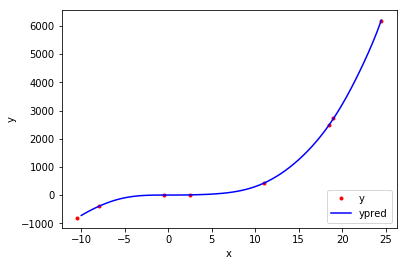

In [131]:
plt.plot(data1_2.x,data1_2.y,'.r') #plot the data

#plt.plot(data1_2.x,data1_2.ypred,'b') #plot the regression

x= np.arange(-10,25,0.5)
y=pd.DataFrame(np.array([x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12]).T,columns=['x','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12'])
plt.plot(x,lm12.predict(y), 'b',label='ypred')

plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')

In [132]:
TrainR2=[0]*12
ValidR2=[0]*12
lm=[0]*12
for M in range(1,13):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm[M-1] = smf.ols(formula=formula, data = data1).fit()
    data1_2['ypred']=lm[M-1].predict(data1_2)
    ValidR2[M-1]=1-((data1_2.ypred-data1_2.y)**2).sum()/((data1_2.y-data1_2.y.mean())**2).sum()
    TrainR2[M-1]=lm[M-1].rsquared

In [133]:
ValidR2=1-((data1_2.ypred-data1_2.y)**2).sum()/((data1_2.y-data1_2.y.mean())**2).sum()
ValidR2

0.9999676665870997

In [140]:
TrainR2=[0]*12
ValidR2=[0]*12
lm=[0]*12
for M in range(1,12):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm[M-1] = smf.ols(formula=formula, data = data1).fit()
    data1_2['ypred']=lm[M-1].predict(data1_2)
    ValidR2[M-1]=1-((data1_2.ypred-data1_2.y)**2).sum()/((data1_2.y-data1_2.y.mean())**2).sum()
    TrainR2[M-1]=lm[M-1].rsquared

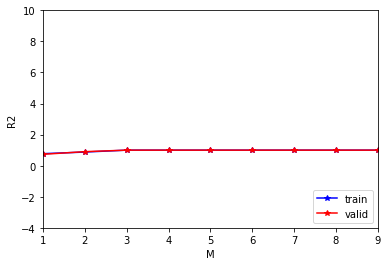

In [141]:
plt.plot(range(1,13),TrainR2[:12],'b-*',label='train')
plt.plot(range(1,13),ValidR2[:12],'r-*',label='valid')
plt.xlabel('M')
plt.ylabel('R2')
plt.ylim(-4,10)
plt.xlim(1,9)
plt.legend(loc='lower right')

### Task 9: What is the optimal value of $1\leq m\leq M$ in terms of the validation R2?

In [142]:
M=np.argmax(ValidR2)+1; M

4

No, I dont get optimal value with M=12

### Task 10:Generate regressors in the test sample and compute the model prediction

In [24]:
lm[M-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.274e+06
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          4.59e-163
Time:                        14:32:39   Log-Likelihood:                -158.72
No. Observations:                  64   AIC:                             327.4
Df Residuals:                      59   BIC:                             338.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3421      0.663     -5.039      0.000      -4.669      -2.015
x              1.2173      0.109     11.140      0.000       0.999       1.436
x2            -2.0051      0.009   -226.109      0.000      -2.023      -1.987
x3             0.4986      0.001    776.169      0.000       0.497       0.500
x4          5.243e-05   3.18e-05      1.651      0.104   -1.11e-05       0.000
==============================================================================
Omnibus:                        0.513   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.632
Skew:                           0.007   Prob(JB):                        0.729
Kurtosis:                       2.513   Cond. No.                     1.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#generate regressors in the validation sample and compute the model prediction
for p in range(1,M+1): #add more powers of x up to M'th
    data1_3['x%d'%p]=data1_3.x**p
data1_3['ypred']=lm[M-1].predict(data1_3)
TestR2=1-((data1_3.ypred-data1_3.y)**2).sum()/((data1_3.y-data1_3.y.mean())**2).sum()
TestR2

0.999998696947183

### Task 11:Visulaize results of Task 10

Text(0,0.5,'y')

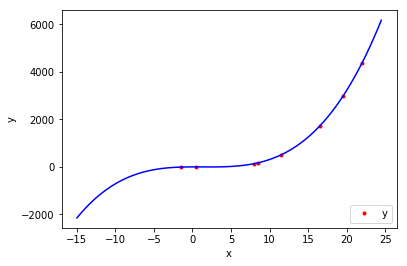

In [26]:
#visualize the fit
plt.plot(data1_3.x,data1_3.y,'.r') #plot the data
x= np.arange(-15,25,0.5)
y=pd.DataFrame(np.array([x,x**2,x**3,x**4]).T,columns=['x','x2','x3','x4'])
plt.plot(x, lm[M-1].predict(y), 'b')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')

## Problem 2:Refer the in class session_05_02 diagnostics python notebook ,to complete this part of the assignment.

### Task 1: Perform regression on Advanced vs Other, "Advanced" which incorporated Master, Doctorate and ProfSchool and "Other" incorporating less than Bachelor.Your regression model will be between predicted and observed income.

In [143]:
#Hint: you might want to use the dataframe "data4" in the session_05_02 diagnostics python notebook.
data4 = pd.read_csv('data/IncomeEduReg.csv')
data4.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679
3,10004,98020.0,2279,29,87,305,984,550,86,238
4,10005,99633.0,5954,133,103,454,2745,1637,219,663


In [144]:
data4.dropna(inplace = True)

In [29]:
data4 = pd.concat([data4.Zipcode,data4.IncomePerCapita,data4.iloc[:,3:].div(data4.PopOver25, axis = 0)], axis = 1)

In [30]:
data4.head()

,Zipcode,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922
1,10002,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857
2,10003,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335
3,10004,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432
4,10005,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354


In [31]:
data4['Other']=data4['LessThanHS']+data4['HighSchool']+data4['SomeCollege']

In [32]:
data4['Advanced']=data4['Master']+data4['Doctorate']+data4['ProfSchool']

In [33]:
lm2_1 = smf.ols(formula = 'IncomePerCapita~Other+Advanced+Bachelor-1', data = data4).fit()
print(lm2_1.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     472.5
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           6.38e-72
Time:                        14:32:40   Log-Likelihood:                -1954.6
No. Observations:                 181   AIC:                             3915.
Df Residuals:                     178   BIC:                             3925.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Other      -4433.1232   2504.641     -1.770      0.0

### Task 2: Visualize the regression fit by plotting the observation versus our prediction for the income per zip code.

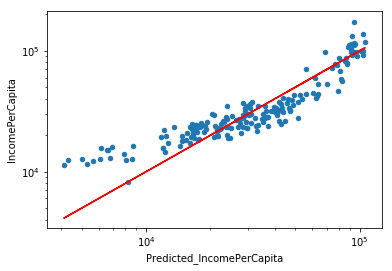

In [34]:
#Your code here
data4['Predicted_IncomePerCapita']=lm2_1.predict()
fig, ax = plt.subplots() #get axis to plot on
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
data4.plot(ax=ax,kind='scatter',x='Predicted_IncomePerCapita',y='IncomePerCapita') #show the data
ax.plot(data4.Predicted_IncomePerCapita,data4.Predicted_IncomePerCapita,'r-'); #show the regression line

## Problem 3:Refer in class session_05_01 Scaling python notebook to complete this part of the assignment.

### Task 1:Establish a scaling relationship  Y∼CXq  between total, violent and property crime vs population (by running log-scale regression where Crime>0). Visualize on the log scale. Does  q=1  fall into the 95% confidence interval? What about 99% CI?

In [35]:
#Your code here
crime2014 = pd.read_csv('data/crime2014/R11460954_SL050.csv') #Load crime data

In [36]:
#rename some columns
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'TotalCrime',\
                          u'SE_T002_002' : 'Violent', \
                          u'SE_T002_003' : 'Property' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'TotalCrime' , 'Violent', 'Property']]

In [37]:
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,TotalCrime,Violent,Property
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923


In [38]:
crime2014.sort_values(by='TotalCrime',ascending=True, inplace=True)
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,TotalCrime,Violent,Property
1429,34017,Hudson County,"Hudson County, New Jersey",34,017,669115.0,0,0,0
1491,36043,Herkimer County,"Herkimer County, New York",36,043,63744.0,0,0,0
1857,42119,Union County,"Union County, Pennsylvania",42,119,44874.0,0,0,0
1856,42117,Tioga County,"Tioga County, Pennsylvania",42,117,42274.0,0,0,0
1854,42107,Schuylkill County,"Schuylkill County, Pennsylvania",42,107,145797.0,0,0,0


In [39]:
#select crime>0
crime2014=crime2014[(crime2014["TotalCrime"]>0)&(crime2014["Violent"]>0)&(crime2014["Property"]>0)]

In [40]:
demographics = pd.read_csv('data/acs2014/R11460953_SL050.csv')
msa = pd.read_csv('msalist.csv')

In [41]:
#convert some location identifiers from string to numeric
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,TotalCrime,Violent,Property,ID,msa,msa_name,Geo_FIPS_y,county
0,34025,Monmouth County,"Monmouth County, New Jersey",34,025,629279.0,2,1,1,34025.0,35620,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",34025,"Monmouth, NJ"
1,42129,Westmoreland County,"Westmoreland County, Pennsylvania",42,129,359320.0,2,1,1,42129.0,38300,"Pittsburgh, PA (Metropolitan Statistical Area)",42129,"Westmoreland, PA"
2,34009,Cape May County,"Cape May County, New Jersey",34,009,95344.0,3,2,1,34009.0,36140,"Ocean City, NJ (Metropolitan Statistical Area)",34009,"Cape May, NJ"
3,13121,Fulton County,"Fulton County, Georgia",13,121,996319.0,5,3,2,13121.0,12060,"Atlanta-Sandy Springs-Roswell, GA (Metropolita...",13121,"Fulton, GA"
4,21185,Oldham County,"Oldham County, Kentucky",21,185,63490.0,6,2,4,21185.0,31140,"Louisville/Jefferson County, KY-IN (Metropolit...",21185,"Oldham, KY"


In [42]:
demomsa.head()

,Geo_FIPS_x,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_T003_001,SE_T003_002,SE_T003_003,SE_T057_001,SE_T083_001,ID,msa,msa_name,Geo_FIPS_y,county
0,1001,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",al,50,0,ACSSF,13,NaN,...,604.3882,594.4361,9.952067,52475,24644,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,1003,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",al,50,0,ACSSF,14,NaN,...,2027.3110,1589.7840,437.527200,50183,26851,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,1007,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",al,50,0,ACSSF,16,NaN,...,626.1689,622.5823,3.586525,37984,18110,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,1009,05000US01009,"Blount County, Alabama","Blount County, Alabama",al,50,0,ACSSF,17,NaN,...,650.6282,644.7759,5.852321,44409,20501,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,1015,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",al,50,0,ACSSF,20,NaN,...,612.2863,605.8677,6.418665,40919,21306,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


Take the log-scale of Total Crime/Violent Crime/ Property Crime and population and do the regression with intercept

In [43]:
msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population', u'TotalCrime', u'Violent', u'Property']]
msaCrime.head()

,Population,TotalCrime,Violent,Property
msa,,,,
10180,168592.0,492,62,430
10420,703825.0,2397,106,2291
10500,151670.0,1364,107,1257
10540,119356.0,1092,23,1069
10580,880167.0,1590,91,1499


#Total Crime

In [44]:
dataLog_TotalCrime = pd.DataFrame(data=[np.log(msaCrime['Population']), np.log(msaCrime['TotalCrime'])]).T
dataLog_TotalCrime.sort_values(by='TotalCrime', ascending=False, inplace=True) #Sorting values for better visualization
dataLog_TotalCrime.head()

,Population,TotalCrime
msa,,
26420,15.685801,11.198352
33100,15.595504,11.025784
36740,14.657689,10.683661
45300,14.885580,10.571035
24860,13.667548,10.098890


In [45]:
#Performing OLS regression
lmTotalCrime=smf.ols('TotalCrime~Population',data=dataLog_TotalCrime).fit()
lmTotalCrime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalCrime   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     321.2
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           1.21e-50
Time:                        14:32:42   Log-Likelihood:                -447.71
No. Observations:                 332   AIC:                             899.4
Df Residuals:                     330   BIC:                             907.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5478      0.603     -5.881      0.000      -4.735      -2.361
Population     0.8618      0.048     17.923      0.000       0.767       0.956
==============================================================================
Omnibus:                      159.770   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1391.487
Skew:                          -1.789   Prob(JB):                    6.96e-303
Kurtosis:                      12.370   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
lmTotalCrime.conf_int(alpha=0.05)

,0,1
Intercept,-4.734608,-2.360980
Population,0.767242,0.956422


In [47]:
lmTotalCrime.conf_int(alpha=0.01)

,0,1
Intercept,-5.110849,-1.984739
Population,0.737255,0.986409


q=1 doesn't fall into the 95% CI nor 99% CI.

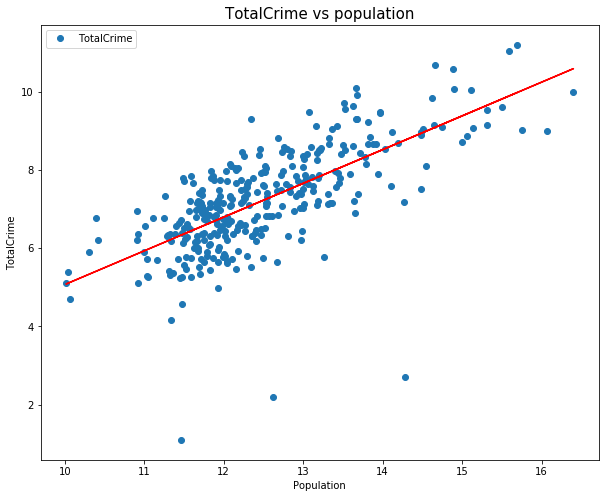

In [48]:
#Visualizing the regression fit
plt.figure(figsize=(10,8))
plt.plot(dataLog_TotalCrime['Population'], dataLog_TotalCrime['TotalCrime'], 'o')
plt.title('TotalCrime vs population', fontsize = 15)
plt.plot(dataLog_TotalCrime['Population'], lmTotalCrime.predict(), '-r')
plt.xlabel('Population')
plt.ylabel('TotalCrime')
plt.legend()

#Total Violent Crime

In [49]:
dataLog_Violent=pd.DataFrame(data=[np.log(msaCrime['Population']),np.log(msaCrime['Violent'])]).T
dataLog_Violent.sort_values(by='Violent',ascending=False,inplace=True)
dataLog_Violent.head()

,Population,Violent
msa,,
26420,15.685801,9.287764
33100,15.595504,9.090768
36740,14.657689,8.882114
31080,16.400430,8.583543
45300,14.885580,8.373323


In [50]:
#Performing OLS regression
lmViolent=smf.ols('Violent~Population',data=dataLog_Violent).fit()
lmViolent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Violent   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     352.9
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           4.69e-54
Time:                        14:32:43   Log-Likelihood:                -459.36
No. Observations:                 332   AIC:                             922.7
Df Residuals:                     330   BIC:                             930.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7032      0.625    -10.728      0.000      -7.932      -5.474
Population     0.9355      0.050     18.785      0.000       0.838       1.034
==============================================================================
Omnibus:                       18.365   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.217
Skew:                          -0.461   Prob(JB):                     9.09e-06
Kurtosis:                       3.911   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
lmViolent.conf_int(alpha=0.05)

,0,1
Intercept,-7.932402,-5.474003
Population,0.837568,1.033504


In [52]:
lmViolent.conf_int(alpha=0.01)

,0,1
Intercept,-8.32208,-5.084325
Population,0.80651,1.064562


q=1 fall into the 95% CI and 99% CI.

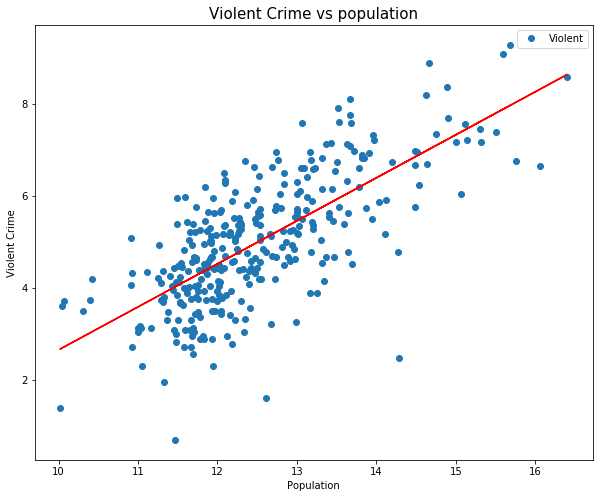

In [53]:
#Visualizing the regression fit
plt.figure(figsize=(10,8))
plt.plot(dataLog_Violent['Population'], dataLog_Violent['Violent'], 'o')
plt.title('Violent Crime vs population', fontsize = 15)
plt.plot(dataLog_Violent['Population'], lmViolent.predict(), '-r')
plt.xlabel('Population')
plt.ylabel('Violent Crime')
plt.legend()

#Total Property Crime

In [54]:
dataLog_Property = pd.DataFrame(data=[np.log(msaCrime['Population']), np.log(msaCrime['Property'])]).T
dataLog_Property.sort_values(by='Property', ascending=False, inplace=True) #Sorting values for better visualization
dataLog_Property.head()

,Population,Property
msa,,
26420,15.685801,11.038191
33100,15.595504,10.869806
36740,14.657689,10.503285
45300,14.885580,10.453313
42660,15.116105,9.964206


In [55]:
#Performing OLS regression
lmProperty=smf.ols('Property~Population',data=dataLog_Property).fit()
lmProperty.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Property   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     273.8
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           3.30e-45
Time:                        14:32:43   Log-Likelihood:                -470.21
No. Observations:                 332   AIC:                             944.4
Df Residuals:                     330   BIC:                             952.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5555      0.646     -5.507      0.000      -4.826      -2.285
Population     0.8515      0.051     16.547      0.000       0.750       0.953
==============================================================================
Omnibus:                      224.552   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3725.457
Skew:                          -2.532   Prob(JB):                         0.00
Kurtosis:                      18.610   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
lmProperty.conf_int(alpha=0.05)

,0,1
Intercept,-4.825545,-2.285413
Population,0.750245,0.952696


In [57]:
lmProperty.conf_int(alpha=0.01)

,0,1
Intercept,-5.228179,-1.882780
Population,0.718155,0.984786


q=1 fall doesn't into the 95% CI nor 99% CI.

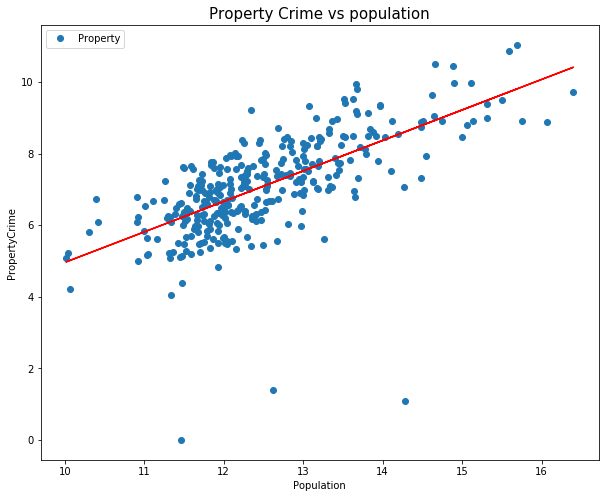

In [58]:
#Visualizing the regression fit
plt.figure(figsize=(10,8))
plt.plot(dataLog_Property['Population'], dataLog_Property['Property'], 'o')
plt.title('Property Crime vs population', fontsize = 15)
plt.plot(dataLog_Property['Population'], lmProperty.predict(), '-r')
plt.xlabel('Population')
plt.ylabel('PropertyCrime')
plt.legend()

### Task 2: Find top 5 and last 5 cities by crime log-residual (difference between log-crime and above regression prediction)

In [59]:
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}
msaCrime['msaName']=msaCrime.index.map(msaNames)

In [60]:
#Total Crime
msaCrime['TotalCrime_IncRes']=lmTotalCrime.predict()-dataLog_TotalCrime['TotalCrime']

In [61]:
msaCrime.sort_values(by='TotalCrime_IncRes',ascending=False).head(5)

,Population,TotalCrime,Violent,Property,msaName,TotalCrime_IncRes
msa,,,,,,
38300,1590575.0,15,12,3,"Pittsburgh, PA (Metropolitan Statistical Area)",6.050774
36140,95344.0,3,2,1,"Ocean City, NJ (Metropolitan Statistical Area)",5.234708
14460,300621.0,9,5,4,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",5.125787
39340,571460.0,320,49,271,"Provo-Orem, UT (Metropolitan Statistical Area)",2.108284
38540,83347.0,65,7,58,"Pocatello, ID (Metropolitan Statistical Area)",2.043034


In [62]:
msaCrime.sort_values(by='TotalCrime_IncRes',ascending=True).head(5)

,Population,TotalCrime,Violent,Property,msaName,TotalCrime_IncRes
msa,,,,,,
31420,230450.0,10881,869,10012,"Macon-Bibb County, GA (Metropolitan Statistica...",-2.200850
24860,862463.0,24316,3316,21000,"Greenville-Anderson-Mauldin, SC (Metropolitan ...",-1.867557
37860,474081.0,13234,1980,11254,"Pensacola-Ferry Pass-Brent, FL (Metropolitan S...",-1.774944
35380,867529.0,20326,2322,18004,"New Orleans-Metairie, LA (Metropolitan Statist...",-1.683276
17900,737334.0,16302,2712,13590,"Columbia, SC (Metropolitan Statistical Area)",-1.602804


In [63]:
#Total Violent Crime
msaCrime['Violent_IncRes']=lmViolent.predict()-dataLog_Violent['Violent']

In [64]:
msaCrime.sort_values(by='Violent_IncRes',ascending=False).head(5)

,Population,TotalCrime,Violent,Property,msaName,TotalCrime_IncRes,Violent_IncRes
msa,,,,,,,
38300,1590575.0,15,12,3,"Pittsburgh, PA (Metropolitan Statistical Area)",6.050774,4.170979
14460,300621.0,9,5,4,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",5.125787,3.487844
36140,95344.0,3,2,1,"Ocean City, NJ (Metropolitan Statistical Area)",5.234708,3.329804
49660,438379.0,633,26,607,"Youngstown-Warren-Boardman, OH-PA (Metropolita...",1.197653,2.192101
12620,153414.0,414,10,404,"Bangor, ME (Metropolitan Statistical Area)",0.717383,2.165352


In [65]:
msaCrime.sort_values(by='Violent_IncRes',ascending=True).head(5)

,Population,TotalCrime,Violent,Property,msaName,TotalCrime_IncRes,Violent_IncRes
msa,,,,,,,
37860,474081.0,13234,1980,11254,"Pensacola-Ferry Pass-Brent, FL (Metropolitan S...",-1.774944,-2.067407
24860,862463.0,24316,3316,21000,"Greenville-Anderson-Mauldin, SC (Metropolitan ...",-1.867557,-2.023231
17900,737334.0,16302,2712,13590,"Columbia, SC (Metropolitan Statistical Area)",-1.602804,-1.968805
31420,230450.0,10881,869,10012,"Macon-Bibb County, GA (Metropolitan Statistica...",-2.200850,-1.918742
26300,97322.0,2408,387,2021,"Hot Springs, AR (Metropolitan Statistical Area)",-1.435535,-1.916264


In [66]:
#Total Property Crime
msaCrime['Property_IncRes']=lmProperty.predict()-dataLog_Property['Property']

In [67]:
msaCrime.sort_values(by='Property_IncRes',ascending=False).head(5)

,Population,TotalCrime,Violent,Property,msaName,TotalCrime_IncRes,Violent_IncRes,Property_IncRes
msa,,,,,,,,
38300,1590575.0,15,12,3,"Pittsburgh, PA (Metropolitan Statistical Area)",6.050774,4.170979,7.504572
36140,95344.0,3,2,1,"Ocean City, NJ (Metropolitan Statistical Area)",5.234708,3.329804,6.206840
14460,300621.0,9,5,4,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",5.125787,3.487844,5.798339
39340,571460.0,320,49,271,"Provo-Orem, UT (Metropolitan Statistical Area)",2.108284,1.806398,2.129452
38540,83347.0,65,7,58,"Pocatello, ID (Metropolitan Statistical Area)",2.043034,1.951231,2.031892


In [68]:
msaCrime.sort_values(by='Property_IncRes',ascending=True).head(5)

,Population,TotalCrime,Violent,Property,msaName,TotalCrime_IncRes,Violent_IncRes,Property_IncRes
msa,,,,,,,,
31420,230450.0,10881,869,10012,"Macon-Bibb County, GA (Metropolitan Statistica...",-2.200850,-1.918742,-2.253241
24860,862463.0,24316,3316,21000,"Greenville-Anderson-Mauldin, SC (Metropolitan ...",-1.867557,-2.023231,-1.870244
37860,474081.0,13234,1980,11254,"Pensacola-Ferry Pass-Brent, FL (Metropolitan S...",-1.774944,-2.067407,-1.755977
35380,867529.0,20326,2322,18004,"New Orleans-Metairie, LA (Metropolitan Statist...",-1.683276,-1.661422,-1.711328
36740,2321418.0,43637,7202,36435,"Orlando-Kissimmee-Sanford, FL (Metropolitan St...",-1.598993,-1.872518,-1.578175


### Task 3:Is there any correlation between residual by income and residual by crime?

In [69]:
#Your code here

In [70]:
demographics = pd.read_csv('data/acs2014/R11460953_SL050.csv')
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)
demographics['Income']=demographics.Population*demographics['Per capita income']

In [71]:
#convert some location identifiers from string to numeric
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

In [72]:
demomsa = pd.merge(demographics, msa, on='ID', how='inner')
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]
logPop = np.log(msaDemo['Population'])
logIncome = np.log(msaDemo['Income'])
dataLog = pd.DataFrame(data=[logIncome, logPop]).T
dataLog.sort_values(by='Income', ascending=False, inplace=True) #Sorting values for better visualization

In [73]:
dataLog.head()

,Income,Population
msa,,
35620,27.297920,16.804472
31080,26.677462,16.385106
16980,26.425884,16.068532
19100,26.019203,15.718069
37980,26.009518,15.609823


In [74]:
lmIncome = smf.ols('Income~Population', data=dataLog).fit()
lmIncome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.157e+04
Date:                Sat, 09 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:32:45   Log-Likelihood:                 175.13
No. Observations:                 379   AIC:                            -346.3
Df Residuals:                     377   BIC:                            -338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3549      0.092    101.819      0.000       9.174       9.536
Population     1.0633      0.007    146.865      0.000       1.049       1.078
==============================================================================
Omnibus:                       19.243   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.781
Skew:                           0.021   Prob(JB):                     2.10e-12
Kurtosis:                       4.845   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
msaDemo['IncRes']=lmIncome.predict()-dataLog['Income']

In [76]:
msaDemo.sort_values(by='IncRes',ascending=False).head(5)

,Population,Area,Income,IncRes
msa,,,,
32580,806447,1570.865088,11713642675,0.632738
15180,415103,890.922380,6184204494,0.565317
29700,259471,3361.482188,3853663292,0.538646
20940,177026,4176.603407,2904819634,0.414732
47300,451108,4824.214846,8069419904,0.387682


In [77]:
msa_Demo_Crime = pd.merge(msaCrime, msaDemo, on='msa', how='inner')

In [78]:
msa_Demo_Crime.head()

,Population_x,TotalCrime,Violent,Property,msaName,TotalCrime_IncRes,Violent_IncRes,Property_IncRes,Population_y,Area,Income,IncRes
msa,,,,,,,,,,,,
10180,168592.0,492,62,430,"Abilene, TX (Metropolitan Statistical Area)",0.626077,0.429063,0.628385,167171,2743.478027,3740034900,0.101101
10420,703825.0,2397,106,2291,"Akron, OH (Metropolitan Statistical Area)",0.274181,1.229685,0.172218,703017,900.129156,19560044574,-0.025948
10500,151670.0,1364,107,1257,"Albany, GA (Metropolitan Statistical Area)",-0.484781,-0.215587,-0.534377,156706,1932.557130,3172077530,0.197068
10540,119356.0,1092,23,1069,"Albany, OR (Metropolitan Statistical Area)",-0.468862,1.097596,-0.576382,118270,2290.129282,2526602010,0.125354
10580,880167.0,1590,91,1499,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",0.877355,1.591433,0.786782,875567,2811.554500,28078339939,-0.154064


In [79]:
msa_Demo_Crime[['TotalCrime_IncRes','IncRes']].corr()

,TotalCrime_IncRes,IncRes
TotalCrime_IncRes,1.00000,-0.20128
IncRes,-0.20128,1.00000
